In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
train = pd.read_csv("Sold-Products/train.csv")
test = pd.read_csv("Sold-Products/test.csv")


Ambos dataframe contienen muchos valores según la tienda y el producto. 
Se utilizará `store = 1` y `product = 1`

In [19]:
train_df = train.loc[(train["store"] == 0) & (train["product"] == 0)].copy()
test_df = test.loc[(test["store"] == 0) & (test["product"] == 0)].copy()

In [21]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3287 entries, 0 to 3286
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         3287 non-null   object
 1   store        3287 non-null   int64 
 2   product      3287 non-null   int64 
 3   number_sold  3287 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         365 non-null    object
 1   store        365 non-null    int64 
 2   product      365 non-null    int64 
 3   number_sold  365 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.3+ KB
None


In [22]:
train_df = train_df.drop(["store", "product"], axis = 1)
test_df = test_df.drop(["store", "product"], axis = 1)

In [23]:
train_df["Date"] = pd.to_datetime(train_df["Date"])
train_df.set_index("Date", inplace = True)
train_df.head()

,number_sold
Date,
2010-01-01,801
2010-01-02,810
2010-01-03,818
2010-01-04,796
2010-01-05,808


In [24]:
test_df["Date"] = pd.to_datetime(test_df["Date"])
test_df.set_index("Date", inplace = True)
test_df.head()

,number_sold
Date,
2019-01-01,845
2019-01-02,851
2019-01-03,840
2019-01-04,842
2019-01-05,845


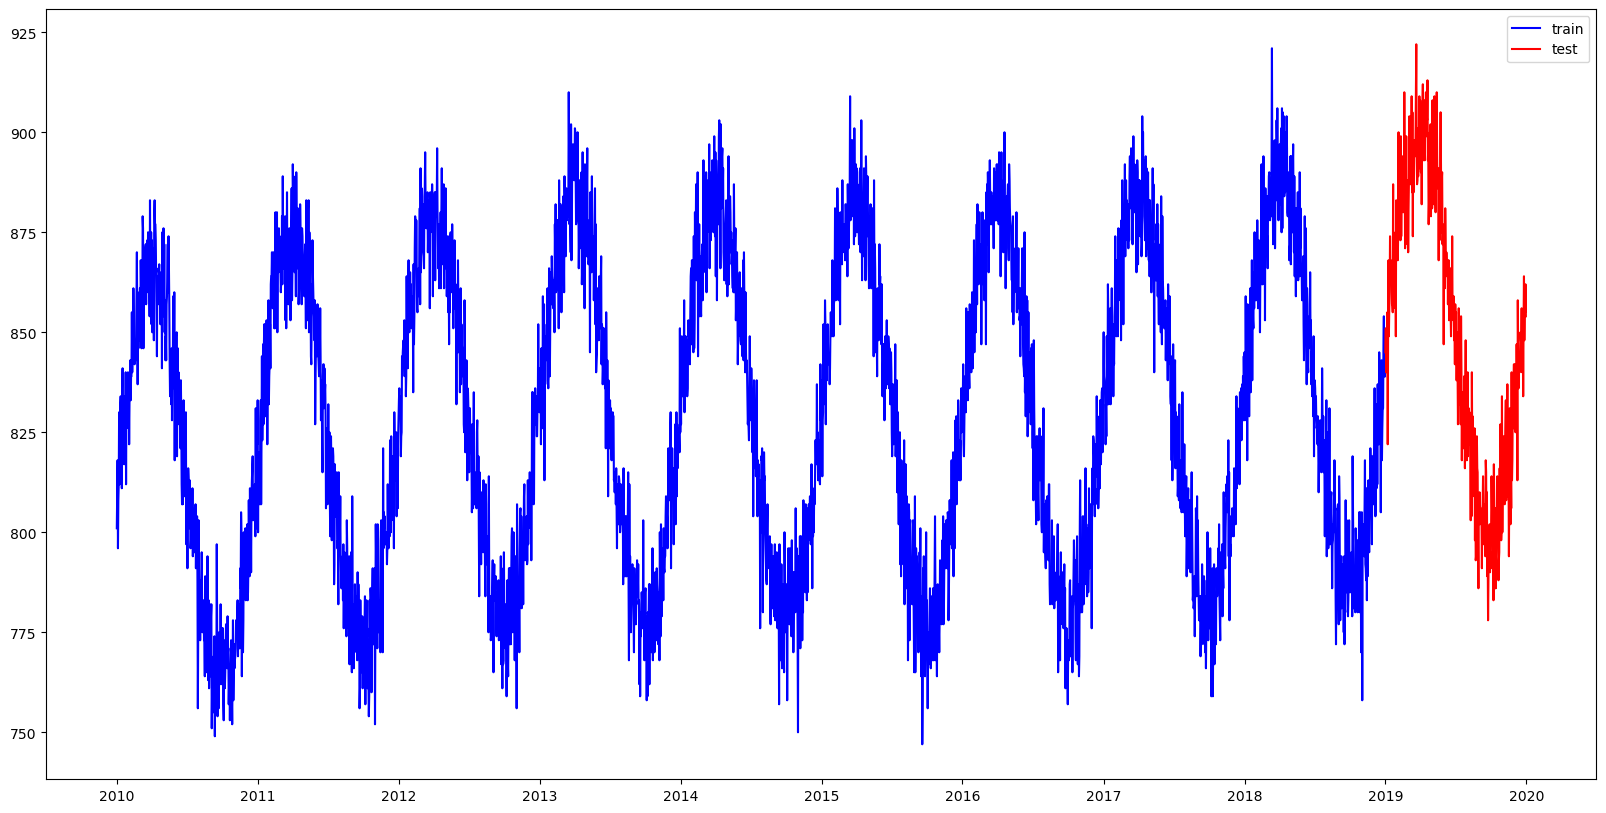

In [25]:
plt.figure(figsize = (20, 10))
plt.plot(train_df, color = "blue", label = "train")
plt.plot(test_df, color = "red", label = "test")
plt.legend()
plt.show()

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Se considera que la variabilidad es constante -> additive
# variabilidad creciente/decreciente -> multiplicative
train_df_decompose = seasonal_decompose(train_df["number_sold"], model = "additive", period = 365)

In [27]:
train_df_decompose.seasonal

Date
2010-01-01    2.825734
2010-01-02    3.186008
2010-01-03    5.926761
2010-01-04    1.169912
2010-01-05    0.164090
                ...   
2018-12-27   -0.147896
2018-12-28    1.341145
2018-12-29   -0.421526
2018-12-30    2.825734
2018-12-31    3.186008
Name: seasonal, Length: 3287, dtype: float64

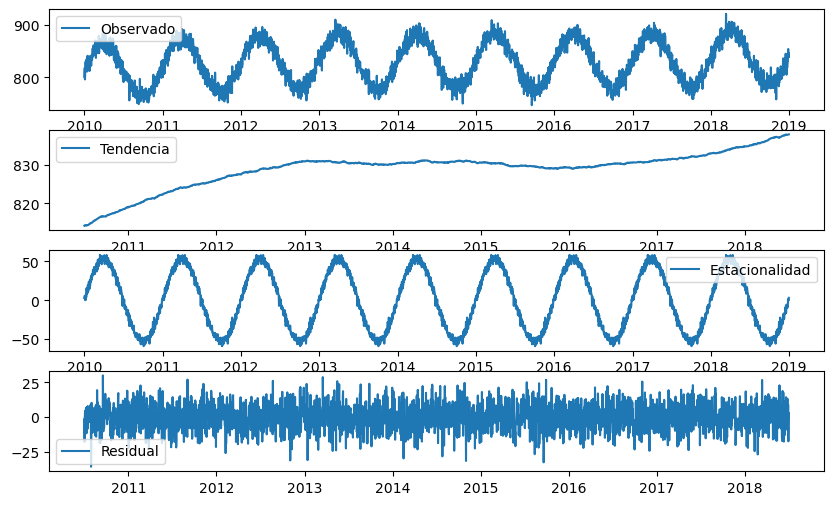

In [28]:
plt.figure(figsize=(10,6))

plt.subplot(4, 1, 1)
plt.plot(train_df_decompose.observed, label="Observado")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(train_df_decompose.trend, label="Tendencia")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(train_df_decompose.seasonal, label="Estacionalidad")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(train_df_decompose.resid, label="Residual")
plt.legend()

plt.show()
